In [1]:
#meta 5/24/2023 Vis Chord Diagram

#Infra: WGC default env `python (local)
#Required libs: numpy, scipy, matplotlib
#here: py 3.7.12, numpy 1.21.6, scipy 1.7.3, matplotlib 3.5.3

#References
# CodeBerg Example
#  Refer to https://codeberg.org/tfardet/mpl_chord_diagram
#`plotapi` `Chord` run `pip install chord`  
#  Refer to https://towardsdatascience.com/create-beautiful-and-interactive-chord-diagrams-using-python-cb5ecb092a7c 

#other cool resources
#bokeh, requires py>=3,8
# Refer to https://holoviews.org/reference/elements/bokeh/Chord.html

In [2]:
import sys 
#python version $my
print(sys.version) 


3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0]


# Chord
Illustrate inter-relationships between data.

A graphical method of displaying inter-relationships between data radially around a circle. It represents flows or connections between several entities (called nodes) with the relationships between the nodes typically drawn as arcs connecting the data.

## Src: CodeBerg Example
Refer to https://codeberg.org/tfardet/mpl_chord_diagram

- Example
https://codeberg.org/tfardet/mpl_chord_diagram/src/branch/main/example.py

Python module to plot chord diagrams with `matplotlib`.

In [3]:
%pip install mpl-chord-diagram

  Using cached mpl_chord_diagram-0.4.1-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


The code requires numpy, scipy and matplotlib  

Requirements.txt  
numpy  
scipy  
matplotlib  

In [4]:
"""
Example file
"""

# import os
# import sys
# sys.path = [os.path.abspath("..")] + sys.path

import matplotlib.pyplot as plt
import numpy as np

from mpl_chord_diagram import chord_diagram

# flux matrix

flux = np.array([
    [11975,  5871,  8916, 2868],
    [ 1951, 10048,  2060, 6171],
    [ 8010, 16145, 81090, 8045],
    [ 1013,   990,   940, 6907]
])

names = ['non-crystal', 'FCC', 'HCP', 'BCC']

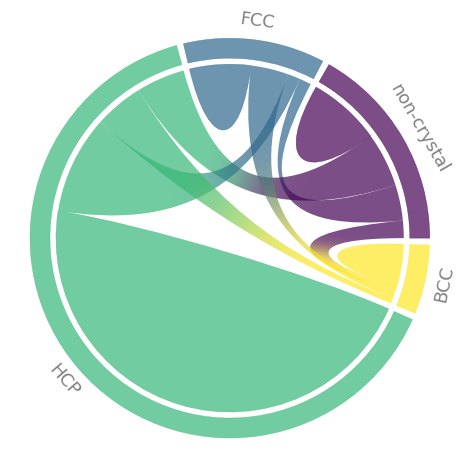

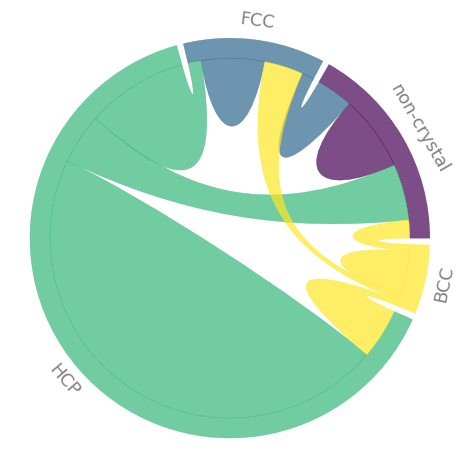

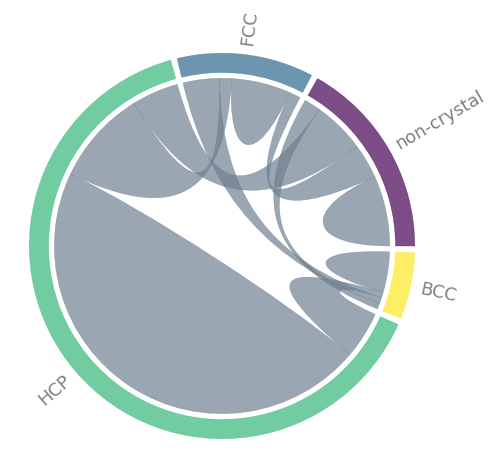

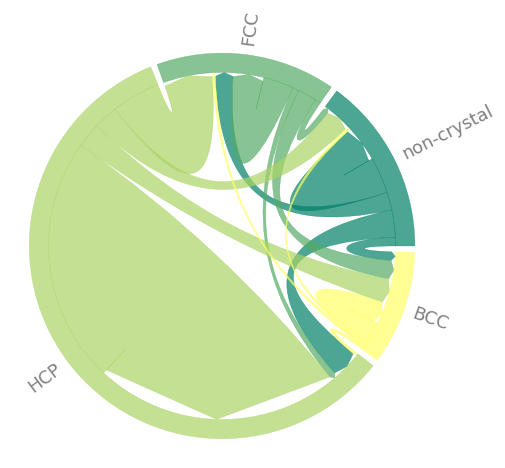

In [5]:
# plot different examples

grads = (True, False, False, False)               # gradient
gaps  = (0.03, 0, 0.03, 0)                        # gap value
sorts = ("size", "distance", None, "distance")    # sort type
cclrs = (None, None, "slategrey", None)           # chord colors
nrota = (False, False, True, True)                # name rotation
cmaps = (None, None, None, "summer")              # colormap
fclrs = "grey"                                    # fontcolors
drctd = (False, False, False, True)               # directed

args = (grads, gaps, sorts, cclrs, nrota, cmaps, drctd)

for grd, gap, srt, cc, nr, cm, d in zip(*args):
    chord_diagram(flux, names, gap=gap, use_gradient=grd, sort=srt, directed=d,
                  cmap=cm, chord_colors=cc, rotate_names=nr, fontcolor=fclrs)

    str_grd = "_gradient" if grd else ""

    plt.savefig(
        "images/example{}_sort-{}{}.png".format(str_grd, srt,
                                                "_directed" if d else ""),
        dpi=600, transparent=True, bbox_inches='tight',
        pad_inches=0.02)

plt.show()

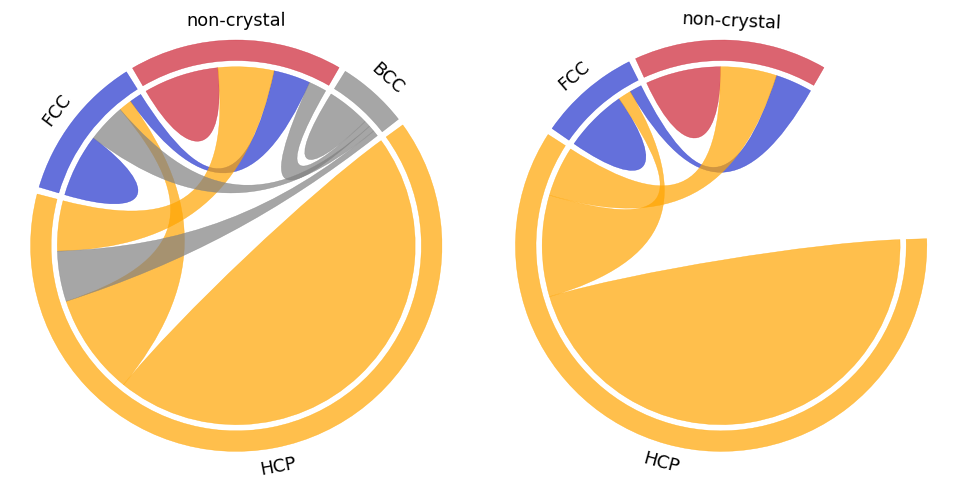

In [6]:
# plot with partial circle

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

keep = list(range(len(flux) - 1))

total = flux.sum()
partial = flux[keep][:, keep].sum()

colors = ["#cc2233", "#2233cc", "orange", "gray"]

chord_diagram(flux, names, ax=ax1, colors=colors, start_at=60)
chord_diagram(flux[keep][:, keep], names[:-1], ax=ax2, colors=colors[:-1],
              start_at=60, extent=360*partial/total)

plt.show()

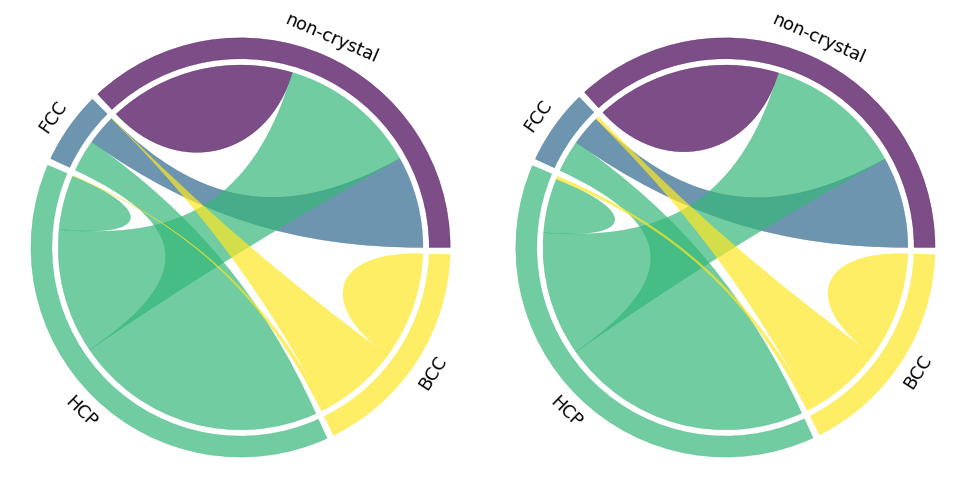

In [7]:
# min chord width zero reciprocals

flux = np.array([
    [11975,  5871,  8916,     0],
    [ 1951,     0,  2060,     0],
    [ 8010, 16145,  3504,     0],
    [    0,  5200,   300,  6907]
])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

chord_diagram(flux, names, ax=ax1)
chord_diagram(flux, names, ax=ax2, min_chord_width=200)

plt.show()


## Src: Housing Data

In [8]:
# importing Pandas libary
import pandas as pd
# reading data from csv
df = pd.read_csv("data/HousingData.csv")

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [9]:
# List of columns to delete and then dropping them.
delete = ['ZN', 'INDUS', 'CHAS', 'DIS','RAD','PTRATIO','B','LSTAT']
df.drop(delete, axis=1, inplace=True)

df.head()

,CRIM,NOX,RM,AGE,TAX,MEDV
0,0.00632,0.538,6.575,65.2,296,24.0
1,0.02731,0.469,6.421,78.9,242,21.6
2,0.02729,0.469,7.185,61.1,242,34.7
3,0.03237,0.458,6.998,45.8,222,33.4
4,0.06905,0.458,7.147,54.2,222,36.2


In [10]:
# Now, matrix contains a 6x6 matrix of the values.
matrix = df.corr()
# Replacing negative values with 0’s, as features can be negatively correlated.
matrix[matrix < 0] = 0
# Multiplying all values by 100 for clarity, since correlation values lie b/w 0 and 1.
matrix = matrix.multiply(100).astype(int)
# Converting the DataFrame to a 2D List, as it is the required input format.
matrix = matrix.values.tolist()

In [11]:
# Names of the features.
names = ["Crime Rate","N-Oxide","Number of rooms","Older buildings","Property Tax","Median Price"]

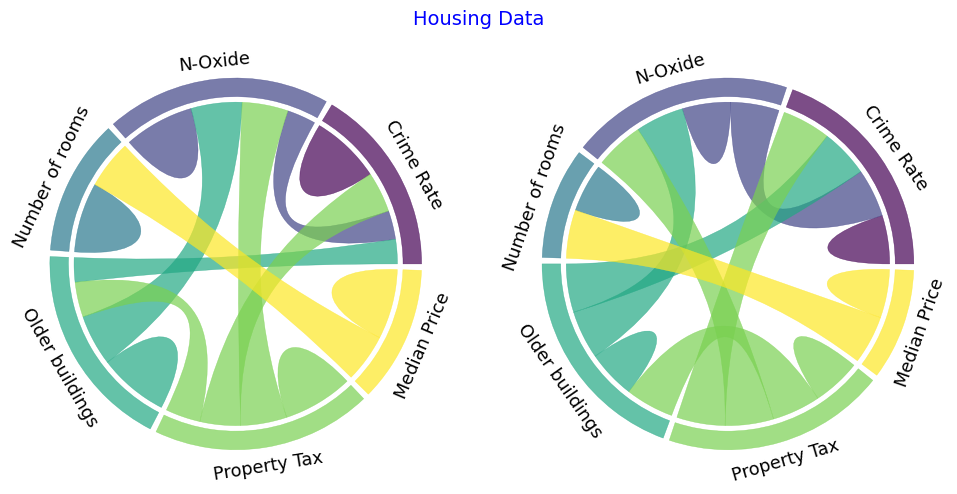

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Housing Data", fontsize=14, color="blue")

chord_diagram(matrix, names, ax=ax1)
chord_diagram(matrix, names, ax=ax2, min_chord_width=200)

plt.show()

## Src: Matrix and Names

In [13]:
names = ["Action", "Adventure", "Comedy", "Drama", "Fantasy", "Thriller"]

matrix = [
    [0, 5, 6, 4, 7, 4],
    [5, 0, 5, 4, 6, 5],
    [6, 5, 0, 4, 5, 5],
    [4, 4, 4, 0, 5, 5],
    [7, 6, 5, 5, 0, 4],
    [4, 5, 5, 5, 4, 0],
]

#$my custom matrix 
matrix2 = [
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0.2],
    [0, 0, 0, 0, 0, 0.4],
    [0, 0, 0, 0, 0, 0.6],
    [0, 0, 0, 0, 0, 0.8],
    [1, 0.2, 0.4, 0.6, 0.8, 0],
]

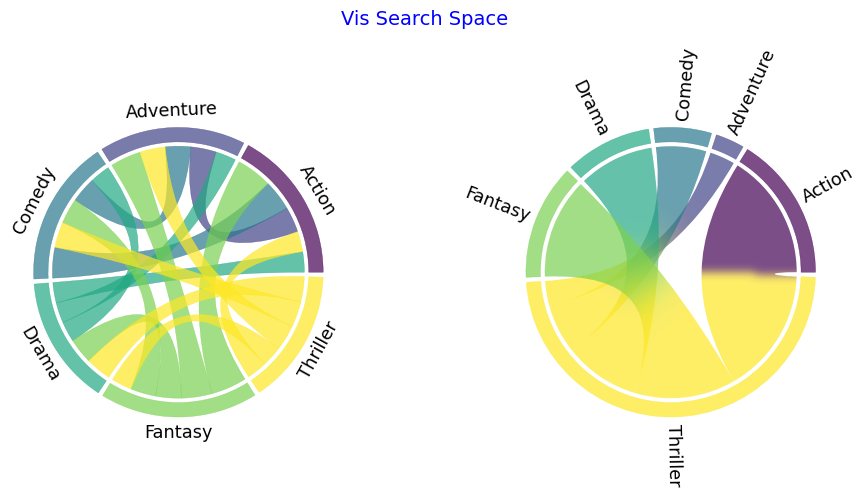

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Vis Search Space", fontsize=14, color="blue")

chord_diagram(matrix, names, ax=ax1)
chord_diagram(matrix2, names, ax=ax2, use_gradient=True, rotate_names=30, min_chord_width=0.1)

plt.show()

## Fn definition 

def chord_diagram(mat, names=None, order=None, width=0.1, pad=2., gap=0.03,
                  chordwidth=0.7, ax=None, colors=None, cmap=None, alpha=0.7,
                  use_gradient=False, chord_colors=None, start_at=0, extent=360,
                  directed=False, show=False, **kwargs):
    """
    Plot a chord diagram.

    Draws a representation of many-to-many interactions between elements, given
    by an interaction matrix.
    The elements are represented by arcs proportional to their degree and the
    interactions (or fluxes) are drawn as chords joining two arcs:

    * for undirected chords, the size of the arc is proportional to its
      out-degree (or simply its degree if the matrix is fully symmetrical), i.e.
      the sum of the element's row.
    * for directed chords, the size is proportional to the total-degree, i.e.
      the sum of the element's row and column.

    Parameters
    ----------
    mat : square matrix
        Flux data, ``mat[i, j]`` is the flux from i to j.
    names : list of str, optional (default: no names)
        Names of the nodes that will be displayed (must be ordered as the
        matrix entries).
    order : list, optional (default: order of the matrix entries)
        Order in which the arcs should be placed around the trigonometric
        circle.
    width : float, optional (default: 0.1)
        Width/thickness of the ideogram arc.
    pad : float, optional (default: 2)
        Distance between two neighboring ideogram arcs. Unit: degree.
    gap : float, optional (default: 0)
        Distance between the arc and the beginning of the cord.
    chordwidth : float, optional (default: 0.7)
        Position of the control points for the chords, controlling their shape.
    ax : matplotlib axis, optional (default: new axis)
        Matplotlib axis where the plot should be drawn.
    colors : list, optional (default: from `cmap`)
        List of user defined colors or floats.
    cmap : str or colormap object (default: viridis)
        Colormap that will be used to color the arcs and chords by default.
        See `chord_colors` to use different colors for chords.
    alpha : float in [0, 1], optional (default: 0.7)
        Opacity of the chord diagram.
    use_gradient : bool, optional (default: False)
        Whether a gradient should be use so that chord extremities have the
        same color as the arc they belong to.
    chord_colors : str, or list of colors, optional (default: None)
        Specify color(s) to fill the chords differently from the arcs.
        When the keyword is not used, chord colors default to the colomap given
        by `colors`.
        Possible values for `chord_colors` are:

        * a single color (do not use an RGB tuple, use hex format instead),
          e.g. "red" or "#ff0000"; all chords will have this color
        * a list of colors, e.g. ``["red", "green", "blue"]``, one per node
          (in this case, RGB tuples are accepted as entries to the list).
          Each chord will get its color from its associated source node, or
          from both nodes if `use_gradient` is True.
    start_at : float, optional (default : 0)
        Location, in degrees, where the diagram should start on the unit circle.
        Default is to start at 0 degrees, i.e. (x, y) = (1, 0) or 3 o'clock),
        and move counter-clockwise
    extent : float, optional (default : 360)
        The angular aperture, in degrees, of the diagram.
        Default is to use the whole circle, i.e. 360 degrees, but in some cases
        it can be useful to use only a part of it.
    directed : bool, optional (default: False)
        Whether the chords should be directed, like edges in a graph, with one
        part of each arc dedicated to outgoing chords and the other to incoming
        ones.
    show : bool, optional (default: False)
        Whether the plot should be displayed immediately via an automatic call
        to `plt.show()`.
    **kwargs : keyword arguments
        Available kwargs are:

        ================  ==================  ==================================
              Name               Type            Purpose and possible values
        ================  ==================  ==================================
        fontcolor         str or list         Color of the names (default: "k")
        ----------------  ------------------  ----------------------------------
        fontsize          int                 Size of the font for names
        ----------------  ------------------  ----------------------------------
        rotate_names      (list of) bool(s)   Rotate names by 90°
        ----------------  ------------------  ----------------------------------
        sort              str                 Either None, "size", or "distance"
                                              (default is "size")
        ----------------  ------------------  ----------------------------------
                                              Minimal chord width to replace
        min_chord_width   float               small entries and zero reciprocals
                                              in the matrix (default: 0)
        ================  ==================  ==================================
    """


In [15]:
mystop

NameError: name 'mystop' is not defined

## Xtra

## Vis with `plotapi` `Chord`
`pip install chord`  
Refer to https://towardsdatascience.com/create-beautiful-and-interactive-chord-diagrams-using-python-cb5ecb092a7c  
Requires a license  


In [ ]:
from chord import Chord
Chord(matrix, names).show()
#Note: The show() function works only with Jupyter Labs.
# (Not Jupyter notebook)